In [1]:
import pandas as pd
import geopandas as gpd


In [2]:
df = pd.read_csv('./poligonos/radios_censales/radios_censales.csv', encoding = 'utf-8', index_col=0)
df.head()

,HOGARES,ID_TOPONIMIA,LINK,MUJERES,OBJECTID,POBLACION_TOTAL,PROVINCIA,Shape__Area,Shape__Length,VARONES,VIVIENDAS,VIVIENDAS_PARTICULARES
0,286,336646,900770404,576,1,1175,TUCUMÁN,5.286449e+06,20415.636295,599,275,231
1,287,336643,900770202,582,2,1182,TUCUMÁN,9.614077e+06,22637.437132,600,270,243
2,136,336633,900630412,331,3,657,TUCUMÁN,9.690494e+06,19348.303204,326,146,131
3,126,336607,900070403,237,4,492,TUCUMÁN,1.479118e+08,59348.908956,255,147,125
4,457,336356,901050504,999,5,1992,TUCUMÁN,1.504134e+07,19818.595872,993,489,432


## Load and process data.



In [3]:
from IPython.display import display, HTML

pregs_dict = {'names': ['PERSONA-CONDACT', 'PERSONA-P01', 'PERSONA-P02', 'PERSONA-P05', 
                        'PERSONA-P07', 'PERSONA-P08', 'PERSONA-P09', 'PERSONA-P10', 'PERSONA-P12',
                        'HOGAR-ALGUNBI', 'HOGAR-H05', 'HOGAR-H06', 'HOGAR-H07', 'HOGAR-H08', 'HOGAR-H09', 
                        'HOGAR-H10', 'HOGAR-H11', 'HOGAR-H12', 'HOGAR-H13', 'HOGAR-H14', 
                        'HOGAR-H19A', 'HOGAR-H19B', 'HOGAR-H19C', 'HOGAR-H19D',
                        'HOGAR-INDHAC', 'HOGAR-PROP', 'HOGAR-TOTPERS', 
                       'VIVIENDA-INCALCONS', 'VIVIENDA-INCALSERV', 'VIVIENDA-INMAT', 'VIVIENDA-TIPVV', 'VIVIENDA-TOTHOG',
                       'VIVIENDA-URP', 'VIVIENDA-V00', 'VIVIENDA-V01', 'VIVIENDA-V02'],
              'prefix': ['Actividad ', 'Relacion con jefe ', 'Sexo ', 'Nacionalidad ', 
                         'Sabe leer ', 'Asist escuela ', 'Nivel educativo ', 'Terminado ', 'Usa PC ',
                        'NBI', 'Pisos ', 'Cubierta techos ', 'Cielorraso ', 'Salida agua ', 'Red agua ',
                        'Tiene baño ', 'Baño con cadena ', 'Desague baño ', 'Baño uso exclusivo ', 'Combustible cocina ',
                        'Heladera ', 'Computadora ', 'Celular ', 'Tel linea ', 'Hacinamiento ', 'Tenencia propiedad ', 'Personas en hogar ',
                        'Calidad de construccion ', 'Calidad de servicios ', 'Calidad de materiales ', 'Tipo de vivienda ', 'Hogares en vivienda ',
                        'Urbana o Rural ', 'Tipo de vivienda colectiva ', 'Tipo de vivienda particular ', 'Ocupacion ',
                        ]}


In [16]:
radios_gdf = gpd.GeoDataFrame.from_file('./poligonos/radios_censales/radios_w_geometry.shp').rename(columns = {'LINK': 'radio'})
radios_gdf['link'] = radios_gdf['radio'].str[:5]
radios_gdf['codprov'] = radios_gdf['radio'].str[:2]
deptos_gdf = gpd.GeoDataFrame.from_file('./poligonos/departamentos/pxdptodatosok.shp', driver = 'ESRI Shapefile')
provs_gdf = gpd.GeoDataFrame.from_file('./poligonos/provincias/provincias.shp').rename(columns = {'IN1': 'codprov'})

In [23]:
info_list = []
info_dptos_list = []
info_provs_list = []

for name in ['PERSONA-P07', 'PERSONA-P08', 'PERSONA-P09', 'PERSONA-P10', 'PERSONA-P12']:
    print(name+".csv")
    df_pregunta = pd.read_csv("./../Datos_censo/Preguntas/merged/"+name+".csv", encoding = 'utf-8')
    df_pregunta['radio'] = df_pregunta['radio'].astype(str).str.zfill(9)
#     df_pregunta.columns = [s.replace(' ', '_') for s in df_pregunta.columns]
    if name == 'PERSONA-P09':
        df_pregunta['2 Primario'] = df_pregunta['2 Primario'] + df_pregunta['3 EGB']
        df_pregunta['4 Secundario'] = df_pregunta['4 Secundario'] + df_pregunta['5 Polimodal']
        df_pregunta.drop(['3 EGB', '5 Polimodal'], axis = 1, inplace = True)
    
    info = df_pregunta.iloc[:, 5:].set_index('radio')
    info = info.add_prefix(name[-3:]+'_')
    
    info_dptos = info.reset_index().merge(radios_gdf[['radio','link']]).groupby('link').sum()
    info_provs = info.reset_index().merge(radios_gdf[['radio','codprov']]).groupby('codprov').sum()
    
    info = pd.concat([info, 100*info.div(info.iloc[:, -1], axis = 0).add_prefix('%_').round(3)], axis = 1)
    info_dptos = pd.concat([info_dptos, 100*info_dptos.div(info_dptos.iloc[:, -1], axis = 0).add_prefix('%_').round(3)], axis = 1)
    info_provs = pd.concat([info_provs, 100*info_provs.div(info_provs.iloc[:, -1], axis = 0).add_prefix('%_').round(3)], axis = 1)
    
    display(info.head(3))
    info_list += [info]
    info_dptos_list += [info_dptos]
    info_provs_list += [info_provs]
    
info_df = pd.concat(info_list, axis = 1)
info_dptos_df = pd.concat(info_dptos_list, axis = 1)
info_provs_df = pd.concat(info_provs_list, axis = 1)

PERSONA-P07.csv


,P07_1 Si,P07_2 No,P07_TOTAL,%_P07_1 Si,%_P07_2 No,%_P07_TOTAL
radio,,,,,,
900770404,982.0,119.0,1101.0,89.2,10.8,100.0
900770202,996.0,121.0,1117.0,89.2,10.8,100.0
900630412,530.0,76.0,606.0,87.5,12.5,100.0


PERSONA-P08.csv


,P08_1 Asiste,P08_2 Asistio,P08_3 Nunca asistio,P08_TOTAL,%_P08_1 Asiste,%_P08_2 Asistio,%_P08_3 Nunca asistio,%_P08_TOTAL
radio,,,,,,,,
900770404,449.0,589.0,63.0,1101.0,40.8,53.5,5.7,100.0
900770202,415.0,629.0,73.0,1117.0,37.2,56.3,6.5,100.0
900630412,219.0,338.0,49.0,606.0,36.1,55.8,8.1,100.0


PERSONA-P09.csv


,"P09_1 Inicial (jardin, preescolar)",P09_2 Primario,P09_4 Secundario,P09_6 Superior no universitario,P09_7 Universitario,P09_8 Post universitario,P09_9 Educacion especial,P09_TOTAL,"%_P09_1 Inicial (jardin, preescolar)",%_P09_2 Primario,%_P09_4 Secundario,%_P09_6 Superior no universitario,%_P09_7 Universitario,%_P09_8 Post universitario,%_P09_9 Educacion especial,%_P09_TOTAL
radio,,,,,,,,,,,,,,,,
900770404,55.0,638.0,280.0,43.0,20.0,0.0,2.0,1038.0,5.3,61.5,27.0,4.1,1.9,0.0,0.2,100.0
900770202,46.0,634.0,245.0,81.0,33.0,1.0,4.0,1044.0,4.4,60.7,23.5,7.8,3.2,0.1,0.4,100.0
900630412,14.0,453.0,74.0,6.0,6.0,0.0,4.0,557.0,2.5,81.3,13.3,1.1,1.1,0.0,0.7,100.0


PERSONA-P10.csv


,P10_1 Si,P10_2 No,P10_TOTAL,%_P10_1 Si,%_P10_2 No,%_P10_TOTAL
radio,,,,,,
900770404,385.0,596.0,981.0,39.2,60.8,100.0
900770202,341.0,653.0,994.0,34.3,65.7,100.0
900630412,188.0,351.0,539.0,34.9,65.1,100.0


PERSONA-P12.csv


,P12_1 Si,P12_2 No,P12_TOTAL,%_P12_1 Si,%_P12_2 No,%_P12_TOTAL
radio,,,,,,
900770404,263.0,838.0,1101.0,23.9,76.1,100.0
900770202,267.0,850.0,1117.0,23.9,76.1,100.0
900630412,119.0,487.0,606.0,19.6,80.4,100.0


## Merge geo data

In [24]:
radios_info_gdf = gpd.GeoDataFrame(info_df.reset_index().merge(radios_gdf[['radio', 'geometry']]))
deptos_info_gdf = gpd.GeoDataFrame(info_dptos_df.reset_index().merge(deptos_gdf[['link', 'departamen', 'provincia', 'geometry']]))
provs_info_gdf = gpd.GeoDataFrame(info_provs_df.reset_index().merge(provs_gdf[['codprov', 'NAM', 'geometry']]))

In [25]:
#Indice educacion (se usa para pintar mapa)

def indice_educ(gdf):
    indice_educ = gdf['%_P09_2 Primario'] + 2*gdf['%_P09_4 Secundario'] + 3*gdf['%_P09_6 Superior no universitario']+ \
    +4*gdf['%_P09_7 Universitario'] + 5*gdf['%_P09_8 Post universitario'] - gdf['%_P07_2 No']
    return indice_educ

radios_info_gdf['indice_educ'] = indice_educ(radios_info_gdf)
deptos_info_gdf['indice_educ'] = indice_educ(deptos_info_gdf)
provs_info_gdf['indice_educ'] = indice_educ(provs_info_gdf)

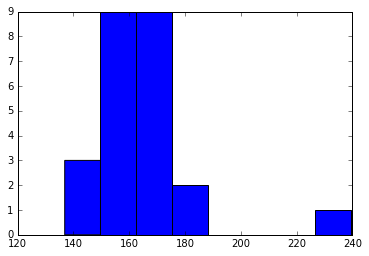

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(provs_info_gdf['indice_educ'].dropna(), 8)
plt.show()

### Upload to Mapbox

In [30]:
import os

def save_geojson(gdf, filename = 'test.geojson'):
    try:    # Delete if geojson exists, cause overwriting is not supported
        os.remove('./geojson/'+filename)
    except OSError:
        pass
    
    gdf.to_file('./geojson/'+filename, driver="GeoJSON")

save_geojson(provs_info_gdf, 'provs_info.geojson')
# save_geojson(deptos_info_gdf, 'deptos_info.geojson')
# save_geojson(radios_info_gdf, 'radios_info.geojson')


In [133]:
from mapbox import Uploader
import json

def upload_file(data, name, username = 'matuteiglesias', token = 'sk.eyJ1IjoibWF0dXRlaWdsZXNpYXMiLCJhIjoiY2puODA4bW8xMGV1dzNrcGtiOGp6NXQ5aCJ9.DohKmjn_o6MK1Y4Q5FG8ew'):
    # Dump into file for upload
    with open('./upload_data.geojson', 'w') as outfile:
        json.dump(data, outfile)

    service = Uploader(access_token=token)
    with open('./upload_data.geojson', 'r') as src:
        # Acquisition of credentials, staging of data, and upload
        # finalization is done by a single method in the Python SDK.
        upload_resp = service.upload(src, username+'.'+name)


def round_geojson(data, r = 5):
    rounded_data = data
    for p in range(len(data['features'])):
        f = data['features'][p]
        shape = np.array(f['geometry']['coordinates']).shape

        for i in range(shape[0]):
            part_i = np.array(f['geometry']['coordinates'])[i]
            for j in range(len(part_i)):
                rounded_data['features'][p]['geometry']['coordinates'][i][j] = np.round(np.array(part_i[j], dtype=float), r).tolist()
    return rounded_data

In [134]:
import os

username = 'matuteiglesias'
token = 'sk.eyJ1IjoibWF0dXRlaWdsZXNpYXMiLCJhIjoiY2puODA4bW8xMGV1dzNrcGtiOGp6NXQ5aCJ9.DohKmjn_o6MK1Y4Q5FG8ew'

files = os.listdir('./geojson/')
files = ['provs_info.geojson', 'deptos_info.geojson', 'radios_info.geojson']
names = [name.split('.')[0] for name in files]

for i in range(len(files)):
    print names[i]
    data = json.load(open('./geojson/'+files[i]))
    if i == 0: # simplify the provinces coordinates
        data = round_geojson(data, 2)

    try:
        upload_file(data, names[i])
    except:
        pass


provs_info
deptos_info
radios_info
